In [1]:
## Day 1 - Basic Exploratory Data Analysis

In [2]:
import pandas as pd
from jedi.inference.utils import to_list

In [3]:
food_delivery_time_data = pd.read_csv(r"D:\ml-tabular-delivery-time\ml-tabular-delivery-time\data\Food_Delivery_Times.csv")
food_delivery_time_data

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [4]:
food_delivery_time_data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [5]:
food_delivery_time_data.shape

(1000, 9)

In [6]:
food_delivery_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [7]:
food_delivery_time_data.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [8]:
target_col = "Delivery_Time_min"
food_delivery_time_data[target_col].describe()

count    1000.000000
mean       56.732000
std        22.070915
min         8.000000
25%        41.000000
50%        55.500000
75%        71.000000
max       153.000000
Name: Delivery_Time_min, dtype: float64

<Axes: >

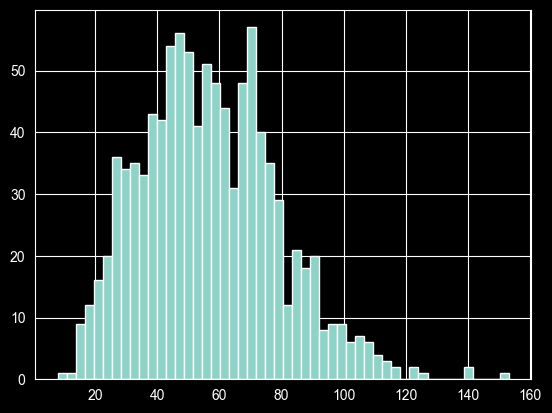

In [9]:
food_delivery_time_data[target_col].hist(bins=50)

In [10]:
# Day 2 - Higher Exploratory Data Analysis

In [11]:
missing = food_delivery_time_data.isna().sum().sort_values(ascending=False)
missing

Weather                   30
Time_of_Day               30
Traffic_Level             30
Courier_Experience_yrs    30
Order_ID                   0
Distance_km                0
Vehicle_Type               0
Preparation_Time_min       0
Delivery_Time_min          0
dtype: int64

In [12]:
missing_percent = (food_delivery_time_data.isna().mean()*100).sort_values(ascending=False)
missing_percent

Weather                   3.0
Time_of_Day               3.0
Traffic_Level             3.0
Courier_Experience_yrs    3.0
Order_ID                  0.0
Distance_km               0.0
Vehicle_Type              0.0
Preparation_Time_min      0.0
Delivery_Time_min         0.0
dtype: float64

In [13]:
missing_table = pd.DataFrame({"missing":missing, "percentage of missing":missing_percent})
missing_table

,missing,percentage of missing
Weather,30,3.0
Time_of_Day,30,3.0
Traffic_Level,30,3.0
Courier_Experience_yrs,30,3.0
Order_ID,0,0.0
Distance_km,0,0.0
Vehicle_Type,0,0.0
Preparation_Time_min,0,0.0
Delivery_Time_min,0,0.0


In [14]:
# Duplicate values

print(f"Duplicate values: {food_delivery_time_data.duplicated().sum()}")

Duplicate values: 0


In [15]:
# Describe

food_delivery_time_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order_ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Distance_km,1000.0,NaN,NaN,NaN,10.05997,5.696656,0.59,5.105,10.19,15.0175,19.99
Weather,970,5,Clear,470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Traffic_Level,970,3,Medium,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_of_Day,970,4,Morning,308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Type,1000,3,Bike,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Preparation_Time_min,1000.0,NaN,NaN,NaN,16.982,7.204553,5.0,11.0,17.0,23.0,29.0
Courier_Experience_yrs,970.0,NaN,NaN,NaN,4.579381,2.914394,0.0,2.0,5.0,7.0,9.0
Delivery_Time_min,1000.0,NaN,NaN,NaN,56.732,22.070915,8.0,41.0,55.5,71.0,153.0


In [16]:
import numpy as np

In [17]:
num_all = food_delivery_time_data.select_dtypes(include = np.number).columns #selects only number datatype(int , float) columns
num_all

Index(['Order_ID', 'Distance_km', 'Preparation_Time_min',
       'Courier_Experience_yrs', 'Delivery_Time_min'],
      dtype='object')

In [18]:
food_delivery_time_data[num_all].agg(["min","max"]).T.sort_values("max",ascending=False).head(25)

,min,max
Order_ID,1.00,1000.00
Delivery_Time_min,8.00,153.00
Preparation_Time_min,5.00,29.00
Distance_km,0.59,19.99
Courier_Experience_yrs,0.00,9.00


In [19]:
# Numerical data vs Categorical data
import numpy as np

target_data = "Delivery_Time_min"
features = [c for c in food_delivery_time_data.columns if c != target_data]


In [20]:
#Numerical Data columns
num_col = food_delivery_time_data[features].select_dtypes(include = np.number).columns.tolist()
print("Number columns : ",num_col)
#Categorical Data Columns
cat_col = food_delivery_time_data[features].select_dtypes(exclude = np.number).columns.tolist()
print("Categorical data columns : ",cat_col)

food_delivery_time_data.shape



Number columns :  ['Order_ID', 'Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
Categorical data columns :  ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


(1000, 9)

In [21]:
id_like = ["Order_ID"]
for c in id_like:
    if c in num_col:
        num_col.remove(c)
        cat_col.append(c)

print("Changed Number columns : ",num_col)
print("Changed Categorical data columns : ",cat_col)


Changed Number columns :  ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs']
Changed Categorical data columns :  ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type', 'Order_ID']


In [22]:
# Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt



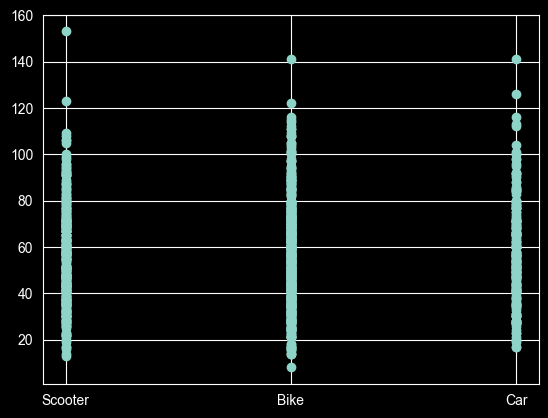

In [23]:
plt.scatter(x="Vehicle_Type" , y=target_data, data=food_delivery_time_data)
plt.show()

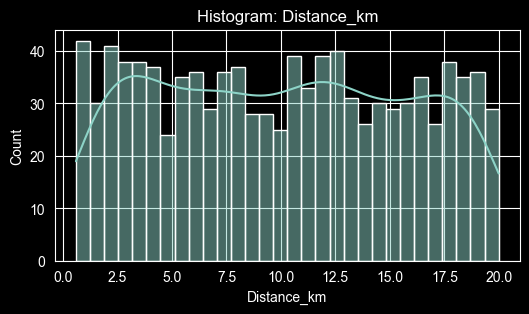

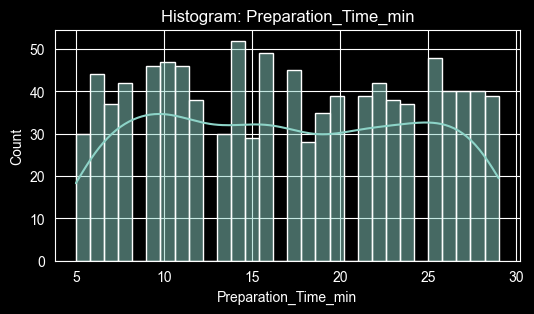

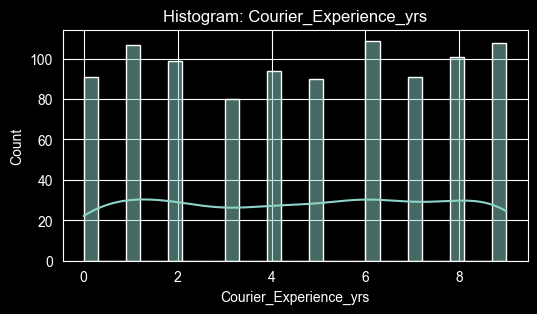

In [24]:
for c in num_col[:8]:
    plt.figure(figsize=(6,3))
    sns.histplot(food_delivery_time_data[c].dropna(), bins=30, kde=True)  # [web:114]
    plt.title(f"Histogram: {c}")
    plt.show()



 Weather
Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
NaN       30
Name: count, dtype: int64


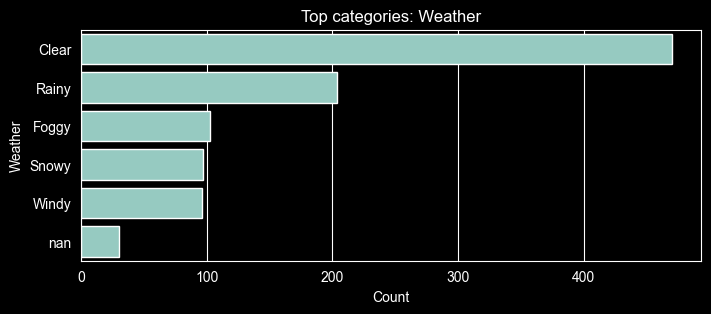


 Traffic_Level
Traffic_Level
Medium    390
Low       383
High      197
NaN        30
Name: count, dtype: int64


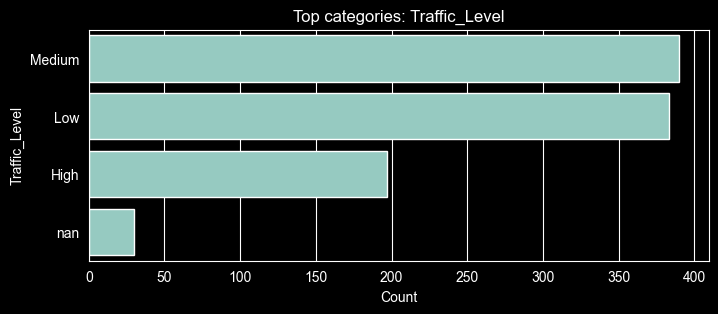


 Time_of_Day
Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
NaN           30
Name: count, dtype: int64


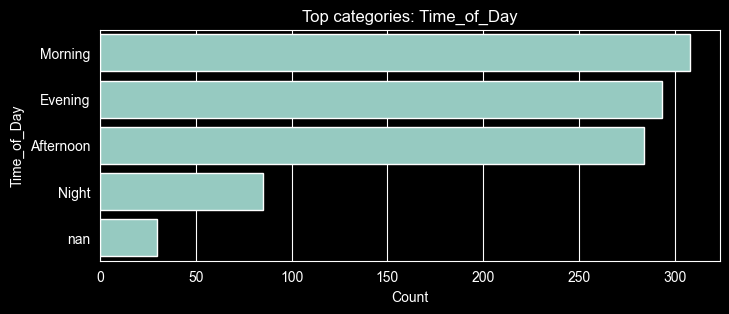


 Vehicle_Type
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64


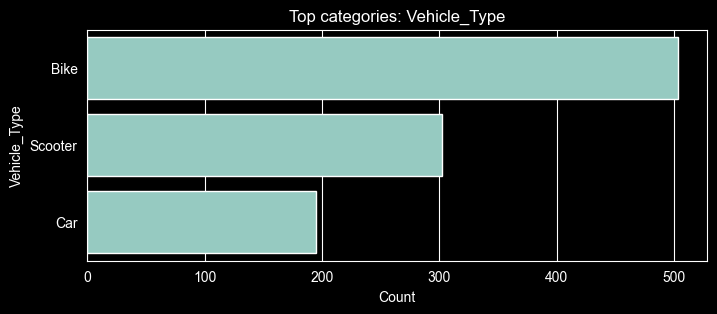


 Order_ID
Order_ID
103    1
522    1
738    1
741    1
661    1
412    1
679    1
627    1
100    1
872    1
664    1
131    1
662    1
309    1
770    1
Name: count, dtype: int64


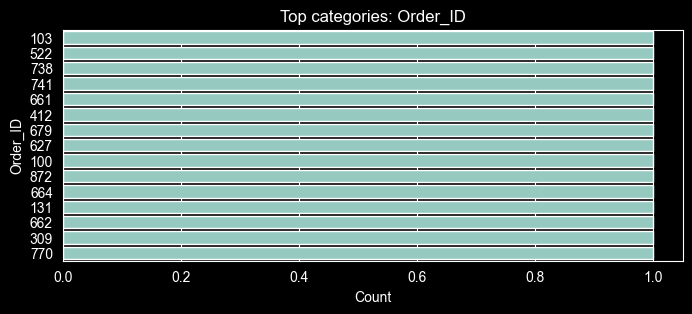

In [25]:
for c in cat_col[:6]:
    print("\n", c)
    print(food_delivery_time_data[c].value_counts(dropna=False).head(15))  # top categories

    plt.figure(figsize=(8,3))
    top = food_delivery_time_data[c].astype("str").value_counts(dropna=False).head(15)
    sns.barplot(x=top.values, y=top.index)
    plt.title(f"Top categories: {c}")
    plt.xlabel("Count")
    plt.ylabel(c)
    plt.show()
